<h3 align="center"><font size="15">Projet 5 : Classifiez automatiquement des biens de consommation</font></h3>

<h3 align="center"><font size="6.5">Word2vec, BERT et USE</font></h3>

Dans ce notebook, nous allons poursuivre notre étude de reconnaissance de textes en utilisant les algorithmes Word2vec, BERT et USE.
La méthodologie sera similaire à celle utilisée précédemment. Nous utiliserons un des algorithmes pour créer un ensemble de vecteur. Ce dernier sera réduit par un t-SNE puis nous créerons une matrice de confusion.

* [Chapitre 1 : Word2vec](#chapter1)
    * [Importation des données et des librairies](#section_1_1)
    * [Etude du texte brut](#section_1_2)
        * [Valeur médiane](#section_1_2_1)
            * [Création du vocabulaire](#section_1_2_1_1)
            * [Visualisation t-SNE](#section_1_2_1_2)
            * [Matrice de confusion](#section_1_2_1_3)
        * [Valeur maximum (hors outliers)](#section_1_2_2)
            * [Création du vocabulaire](#section_1_2_2_1)
            * [Visualisation t-SNE](#section_1_2_2_2)
            * [Matrice de confusion](#section_1_2_2_3)        
        * [Valeur maximum](#section_1_2_3)
            * [Création du vocabulaire](#section_1_2_3_1)
            * [Visualisation t-SNE](#section_1_2_3_2)
            * [Matrice de confusion](#section_1_2_3_3)        
    * [Etude des documents avec un filtre sur les mots](#section_1_3)
        * [Préparation des données](#section_1_3_1)
        * [Valeur médiane](#section_1_3_2)
            * [Création du vocabulaire](#section_1_3_2_1)
            * [Visualisation t-SNE](#section_1_3_2_2)
            * [Matrice de confusion](#section_1_3_2_3)
        * [Valeur maximum (hors outliers)](#section_1_3_3)
            * [Création du vocabulaire](#section_1_3_3_1)
            * [Visualisation t-SNE](#section_1_3_3_2)
            * [Matrice de confusion](#section_1_3_3_3)        
        * [Valeur maximum](#section_1_3_4)
            * [Création du vocabulaire](#section_1_3_4_1)
            * [Visualisation t-SNE](#section_1_3_4_2)
            * [Matrice de confusion](#section_1_3_4_3)  
    * [Bilan](#section_1_4)        
       
* [Chapitre 2 : Bidirectional Encoder Representations from Transformers (BERT)](#chapter2)
    * [Création de fonctions](#section_2_1) 
    * [Modèle pré-entraîné (Hugging Face)](#section_2_2)
        * [Valeur médiane](#section_2_2_1)
            * [Création du vocabulaire](#section_2_2_1_1)
            * [Visualisation t-SNE](#section_2_2_1_2)
            * [Matrice de confusion](#section_2_2_1_3)
        * [Valeur maximum (hors outliers)](#section_2_2_2)
            * [Création du vocabulaire](#section_2_2_2_1)
            * [Visualisation t-SNE](#section_2_2_2_2)
            * [Matrice de confusion](#section_2_2_2_3)        
        * [Valeur maximum](#section_2_2_3)
            * [Création du vocabulaire](#section_2_2_3_1)
            * [Visualisation t-SNE](#section_2_2_3_2)
            * [Matrice de confusion](#section_2_2_3_3)   
    * [Modèle pré-entraîné (TensorFlow)](#section_2_3)
        * [Valeur médiane](#section_2_3_1)
            * [Création du vocabulaire](#section_2_3_1_1)
            * [Visualisation t-SNE](#section_2_3_1_2)
            * [Matrice de confusion](#section_2_3_1_3)
        * [Valeur maximum (hors outliers)](#section_2_3_2)
            * [Création du vocabulaire](#section_2_3_2_1)
            * [Visualisation t-SNE](#section_2_3_2_2)
            * [Matrice de confusion](#section_2_3_2_3)        
        * [Valeur maximum](#section_2_3_3)
            * [Création du vocabulaire](#section_2_3_3_1)
            * [Visualisation t-SNE](#section_2_3_3_2)
            * [Matrice de confusion](#section_2_3_3_3)
    * [Bilan](#section_2_4)
    
* [Chapitre 3 : Universal Sentence Encoder (USE)](#chapter3)
    * ["Encoder"](#section_3_1)
        * [Création des variables](#section_3_1_1)     
        * [Visualisation t-SNE](#section_3_1_2)
        * [Matrice de confusion](#section_3_1_3)  
    * ["Encoder large"](#section_3_2)
        * [Création des variables](#section_3_2_1)     
        * [Visualisation t-SNE](#section_3_2_2)
        * [Matrice de confusion](#section_3_2_3)
    * [Bilan de l'étude de texte](#section_3_3)

<a class="anchor" id="chapter1"></a>
# Chapitre 1 : Word2vec

<a class="anchor" id="section_1_1"></a>
## Importation des données et des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import scipy.stats as st
import random
import itertools
import datetime
import statistics
import time
from transformers import TFAutoModel, AutoTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import cluster, metrics, manifold, decomposition, preprocessing
from sklearn import manifold, decomposition
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment
from matplotlib.collections import LineCollection
from matplotlib import colors
from itertools import chain
from matplotlib.lines import Line2D
import statsmodels.api as sm

data = pd.read_csv("data_projet_6.csv", low_memory=False, index_col=0)

In [2]:
import Fonction_P6 as p6

In [3]:
def outlier_nbr(y):
    
    q1 = np.quantile(y, 0.25)
    
    q3 = np.quantile(y, 0.75)
    med = np.median(y)
    
    iqr = q3-q1
    
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    
    return upper_bound

In [10]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

In [11]:
lab_category = data["category_label"].values
n_clusters = len(data["Main_category"].unique())


data['len_text_clean'] = data['text_clean'].apply(lambda x : len(word_tokenize(x)))
data['len_text_clean_dl'] = data['text_clean_deep_l'].apply(lambda x : len(word_tokenize(x)))
display(data.iloc[:5,-4:])

,text_clean_bis,len_text_clean_bis,len_text_clean,len_text_clean_dl
0,uberlyfe large vinyl sticker for rs.595 . uber...,19,24,33
1,of piyo piyo four stage waterproof bib ( yello...,35,43,52
2,of cheeky chompers the neckerchew - simple cla...,39,43,57
3,of f mini klub baby girl s bodysuit : : green ...,37,48,58
4,of jacadi paris baby s striped casual blue shi...,102,106,133


Pour les algorithmes BERT et Word2vec, nous ferons varier l'hyperparamètre "max_len" qui est la longueur maximum des phrases. Pour déterminer les valeurs de cet hyperparamètre, nous allons nous baser sur la distribution de la longueur des phrases pour chaque document. Nous allons conserver la médiane, la valeur maximale avec ou sans les valeurs extrêmes (outliers).

Un autre paramètre sera étudié et sera l'application d'un filtre de mots. Les mots à filtrer proviennent du notebook précédent et nous analyserons la différence entre les résultats obtenus selon les conditions et hyperparamètres choisis.

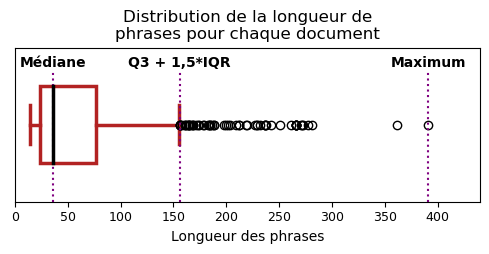

In [12]:
median_len = int(statistics.median(data["len_text_clean"]))

iqr_len = int(outlier_nbr(data["len_text_clean"]))+1

max_len = data["len_text_clean"].max()


plt.figure(figsize=(6,2))
plt.boxplot(data['len_text_clean'], vert=False, showfliers=True, patch_artist=True, widths = 1,
            flierprops = dict(color="firebrick", linewidth=0.5),
            capprops =dict(color="firebrick", linewidth=2.5),
            boxprops=dict(facecolor="white", color="firebrick",linewidth=2.5),
            whiskerprops=dict(color="firebrick", linewidth=2.5),
            medianprops=dict(color="black",linewidth=2.5),
            showmeans=False, 
            meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':(1, 1, 0, 0.5)})

plt.vlines(x = [median_len, iqr_len, max_len], ymin = 0, ymax = 1.7, ls="dotted", colors = 'purple')

plt.text(median_len, 1.75, "Médiane", fontsize=10, ha="center", color="black", weight="bold")
plt.text(iqr_len, 1.75, "Q3 + 1,5*IQR", fontsize=10, ha="center", color="black", weight="bold")
plt.text(max_len, 1.75, "Maximum", fontsize=10, ha="center", color="black", weight="bold")

plt.xlabel("Longueur des phrases",  fontsize=10)

plt.xticks(fontsize = 9)
plt.yticks([])

plt.xlim(0,440)
plt.ylim(0,2)

plt.title("Distribution de la longueur de\nphrases pour chaque document", fontsize = 12)

plt.show()

<a class="anchor" id="section_1_2"></a>
## Etude du texte brut

<a class="anchor" id="section_1_2_1"></a>
### Valeur médiane

<a class="anchor" id="section_1_2_1_1"></a>
#### Création du vocabulaire

In [13]:
max_len_med =  int(statistics.median(data["len_text_clean"]))
sentences = data['text_clean'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [14]:
w2v_min_count = 1
w2v_window = 5
w2v_size = 300
w2v_epochs = 100

w2v_model = gensim.models.Word2Vec(min_count = w2v_min_count, 
                                   window = w2v_window,
                                   vector_size = w2v_size,
                                   seed = 0,
                                   workers = 1)

w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples = w2v_model.corpus_count, epochs = w2v_epochs)

model_vectors = w2v_model.wv

w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))

Vocabulary size: 4727


In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                            maxlen = max_len_med,
                            padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Number of unique words: 4728


In [16]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
display(embedding_matrix.shape)

i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

(4728, 300)

Word embedding rate :  1.0
Embedding matrix: (4728, 300)


In [17]:
input = Input(shape=(len(x_sentences), max_len_med), dtype = 'float64')
word_input = Input(shape=(max_len_med,),dtype='float64')  

word_embedding=Embedding(input_dim = vocab_size,
                         output_dim = w2v_size,
                         weights = [embedding_matrix],
                         input_length = max_len_med)(word_input)

word_vec = GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 36)]              0         
                                                                 
 embedding (Embedding)       (None, 36, 300)           1418400   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,418,400
Trainable params: 1,418,400
Non-trainable params: 0
_________________________________________________________________


In [18]:
embeddings_med = embed_model.predict(x_sentences)
embeddings_med.shape

33/33 [==============================] - 0s 3ms/step


(1050, 300)

<a class="anchor" id="section_1_2_1_2"></a>
#### Visualisation t-SNE

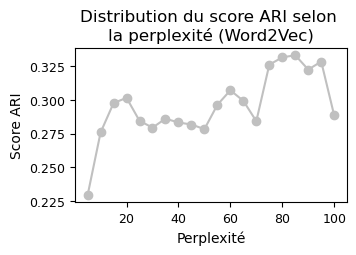

In [19]:
best_perp_w2v_med = p6.best_perplexity(lab_category, embeddings_med, "Word2Vec",
                                       perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle Word2Vec, le score ARI est : 0.3333


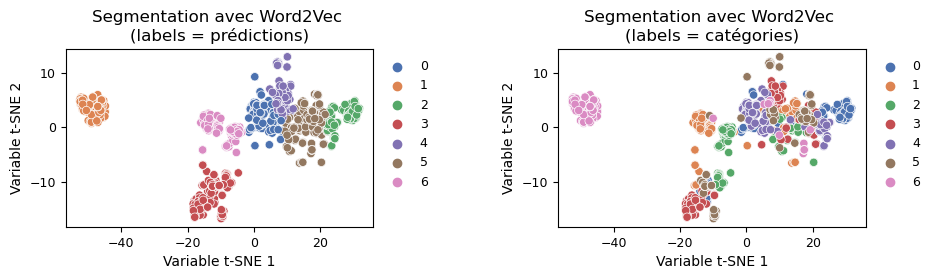

In [20]:
ARI_w2vec_med, lab_w2vec_med = p6.graph_t_sne("Word2Vec", best_perp_w2v_med, embeddings_med, lab_category, n_clusters = 7)

<a class="anchor" id="section_1_2_1_3"></a>
#### Matrice de confusion

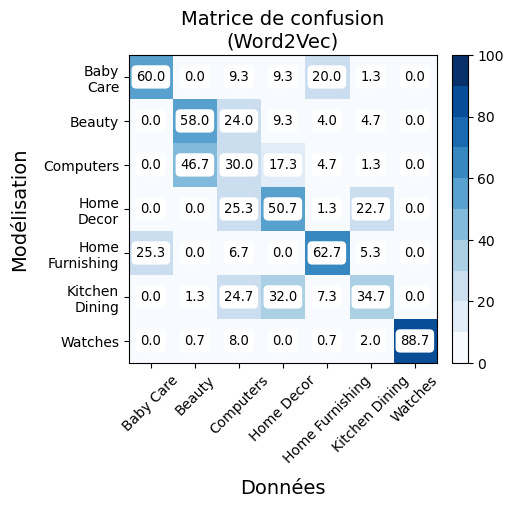

In [21]:
data["lab_w2vec_med"] = pd.Series(lab_w2vec_med)

p6.graph_matrix(lab_category, data["lab_w2vec_med"], "Word2Vec")

Lorsque la longueur des phrases est égale à la médiane (36), alors le score ARI est de 0.333 et il y a quelques difficultés à distinguer la plupart des catégories, mise à part les montres.

Nous allons continuer en considérant une valeur de longueur de phrase égale à la valeur maximum sans considérer d'outliers.
<a class="anchor" id="section_1_2_2"></a>
### Valeur maximum (hors outliers)

<a class="anchor" id="section_1_2_2_1"></a>
#### Création du vocabulaire

In [31]:
max_len_iqr =  int(outlier_nbr(data["len_text_clean"]))+1

In [32]:
w2v_min_count = 1
w2v_window = 5
w2v_size = 300
w2v_epochs = 100

w2v_model = gensim.models.Word2Vec(min_count = w2v_min_count, 
                                   window = w2v_window,
                                   vector_size = w2v_size,
                                   seed = 0,
                                   workers = 1)

w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples = w2v_model.corpus_count, epochs = w2v_epochs)

model_vectors = w2v_model.wv

w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))

Vocabulary size: 4727


In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                            maxlen = max_len_iqr,
                            padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Number of unique words: 4728


In [34]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
display(embedding_matrix.shape)

i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

(4728, 300)

Word embedding rate :  1.0
Embedding matrix: (4728, 300)


In [35]:
input = Input(shape=(len(x_sentences), max_len_iqr), dtype = 'float64')
word_input = Input(shape=(max_len_iqr,),dtype='float64')  

word_embedding=Embedding(input_dim = vocab_size,
                         output_dim = w2v_size,
                         weights = [embedding_matrix],
                         input_length = max_len_iqr)(word_input)

word_vec = GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 156)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 156, 300)          1418400   
                                                                 
 global_average_pooling1d_2   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,418,400
Trainable params: 1,418,400
Non-trainable params: 0
_________________________________________________________________


In [36]:
embeddings_iqr = embed_model.predict(x_sentences)
embeddings_iqr.shape

33/33 [==============================] - 0s 6ms/step


(1050, 300)

<a class="anchor" id="section_1_2_2_2"></a>
#### Visualisation t-SNE

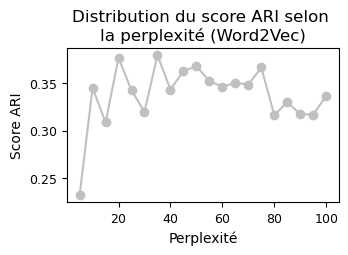

In [37]:
best_perp_w2v_iqr = p6.best_perplexity(lab_category, embeddings_iqr, "Word2Vec", 
                                       perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle Word2Vec, le score ARI est : 0.37929


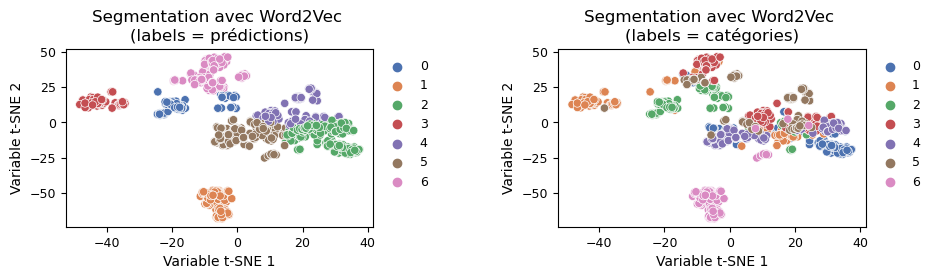

In [38]:
ARI_w2vec_iqr, lab_w2vec_iqr = p6.graph_t_sne("Word2Vec", best_perp_w2v_iqr, embeddings_iqr, lab_category, n_clusters = 7)

<a class="anchor" id="section_1_2_2_3"></a>
#### Matrice de confusion

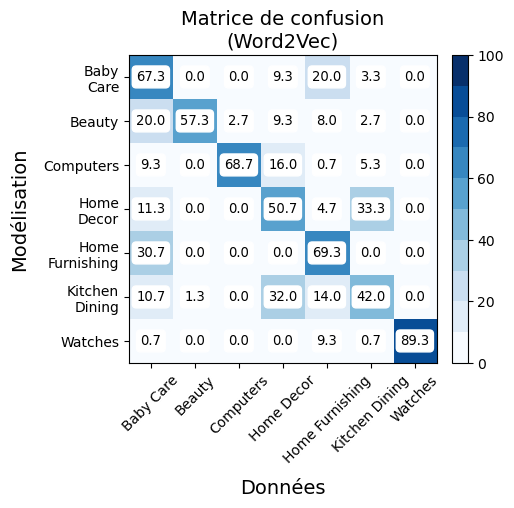

In [39]:
data["lab_w2vec_iqr"] = pd.Series(lab_w2vec_iqr)

p6.graph_matrix(lab_category, data["lab_w2vec_iqr"], "Word2Vec")

Augmenter la longueur maximale des phrases a permis d'améliorer le score ARI mais aussi les correspondances globales entre chaque catégorie.

Nous allons encore augmenter cette longueur afin de confirmer ou non l'impact de cet hyperparamètre sur le score ARI.

<a class="anchor" id="section_1_2_3"></a>
### Valeur maximum

<a class="anchor" id="section_1_2_3_1"></a>
#### Création du vocabulaire

In [49]:
max_len_max =  (data["len_text_clean"].max())+1

In [50]:
w2v_min_count = 1
w2v_window = 5
w2v_size = 300
w2v_epochs = 100

w2v_model = gensim.models.Word2Vec(min_count = w2v_min_count, 
                                   window = w2v_window,
                                   vector_size = w2v_size,
                                   seed = 0,
                                   workers = 1)

w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples = w2v_model.corpus_count, epochs = w2v_epochs)

model_vectors = w2v_model.wv

w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))

Vocabulary size: 4727


In [51]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                            maxlen = max_len_max,
                            padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Number of unique words: 4728


In [52]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
display(embedding_matrix.shape)

i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

(4728, 300)

Word embedding rate :  1.0
Embedding matrix: (4728, 300)


In [53]:
input = Input(shape=(len(x_sentences), max_len_max), dtype = 'float64')
word_input = Input(shape=(max_len_max,),dtype='float64')  

word_embedding=Embedding(input_dim = vocab_size,
                         output_dim = w2v_size,
                         weights = [embedding_matrix],
                         input_length = max_len_max)(word_input)

word_vec = GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 392)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 392, 300)          1418400   
                                                                 
 global_average_pooling1d_4   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,418,400
Trainable params: 1,418,400
Non-trainable params: 0
_________________________________________________________________


In [54]:
embeddings_max = embed_model.predict(x_sentences)
embeddings_max.shape

33/33 [==============================] - 0s 8ms/step


(1050, 300)

<a class="anchor" id="section_1_2_3_2"></a>
#### Visualisation t-SNE

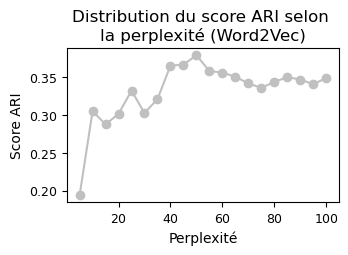

In [55]:
best_perp_w2v_max = p6.best_perplexity(lab_category, embeddings_max, "Word2Vec", 
                                       perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle Word2Vec, le score ARI est : 0.37952


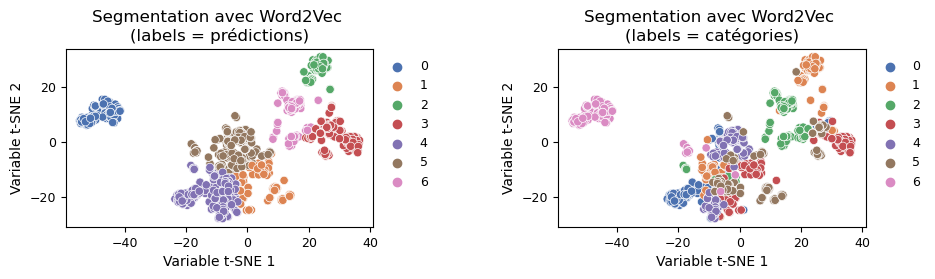

In [56]:
ARI_w2vec_max, lab_w2vec_max = p6.graph_t_sne("Word2Vec", best_perp_w2v_max, embeddings_max, lab_category, n_clusters = 7)

<a class="anchor" id="section_1_2_3_3"></a>
#### Matrice de confusion

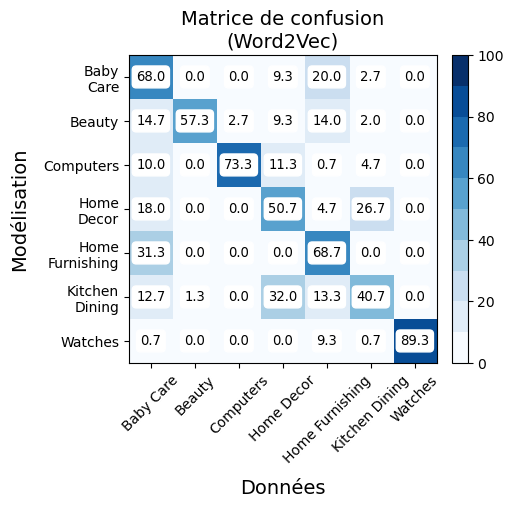

In [57]:
data["lab_w2vec_max"] = pd.Series(lab_w2vec_max)

p6.graph_matrix(lab_category, data["lab_w2vec_max"], "Word2Vec")

Ici, nous avons doublé l'hyperparamètre "max_len" et il n'y a pas eu d'amélioration du score ARI et la matrice de confusion reste globalement inchangée. 

Nous allons maintenant mener la même étude sur les mêmes documents auxquels nous avons appliquer un filtre sur les mots comme dans le notebook précédent.

En premier lieu, nous allons préparer les documents qui seront traités puis nous utiliserons l'algorithme Word2vec.

<a class="anchor" id="section_1_3"></a>
## Etude des documents avec un filtre sur les mots

<a class="anchor" id="section_1_3_1"></a>
### Préparation des données

In [4]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
data["word_tok_bis"] = data.iloc[:]["description"].str.lower().apply(lambda x : (word_tokenize(x)))

In [6]:
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')', '!', '-']

stop_w_2 = ["cm", "day", "guarantee", "shipping", "delivery", "g", "kg", 
            "buy", "cash", "free", "genuine", "price", "product", "products",
            "replacement", "30", "online", "flipkart", "com", "flipkart.com",
            "specification", "specifications"] 
                                                                     
words_to_remove = stop_w_2 + ["cotton", "detail", "fabric", "boy", "ideal", "general", "package", "feature", "sale", 
                              "type", "color", "wash", "number", "pattern", "pack", "content", "box", "printed", "key", 
                              "length", "combo", "ml", "best", "warranty", "soft", "material", "rs", "quality", "brand", 
                              "model", "print", "size", "shape", "please", "high", "inch", "dimension", "made", "width", 
                              "height", "code", "perfect", "give", "come"]

In [7]:
lemmatizer = WordNetLemmatizer()
data["lemmatize_stop_word_tok_bis"] = data["word_tok_bis"].apply(lambda lst:[lemmatizer.lemmatize(word) for word in lst])

data["stop_word_tok_bis"] = data["lemmatize_stop_word_tok_bis"].apply(lambda x: [item for item in x if item 
                                                                                 not in words_to_remove])

data["text_clean_bis"] = data["stop_word_tok_bis"].apply(lambda lst:[' '.join(lst)])

data["text_clean_bis"] = data["text_clean_bis"].astype(str)

data["text_clean_bis"] = data["text_clean_bis"].str.replace(r"\[", "", regex = True)
data["text_clean_bis"] = data["text_clean_bis"].replace(r"\'", "", regex = True)
data["text_clean_bis"] = data["text_clean_bis"].replace(r"\]", "", regex = True)
data["text_clean_bis"] = data["text_clean_bis"].replace(r'\"', '', regex = True)

data['len_text_clean_bis'] = data['text_clean_bis'].apply(lambda x : len(word_tokenize(x)))

<a class="anchor" id="section_1_3_2"></a>
### Valeur médiane

<a class="anchor" id="section_1_3_2_1"></a>
#### Création du vocabulaire

In [22]:
max_len_med_filt =  int(statistics.median(data["len_text_clean_bis"]))+1
sentences_bis = data['text_clean_bis'].to_list()
sentences_bis = [gensim.utils.simple_preprocess(text) for text in sentences_bis]

In [23]:
w2v_min_count = 1
w2v_window = 5
w2v_size = 300
w2v_epochs = 100

w2v_model = gensim.models.Word2Vec(min_count = w2v_min_count, 
                                   window = w2v_window,
                                   vector_size = w2v_size,
                                   seed = 0,
                                   workers = 1)

w2v_model.build_vocab(sentences_bis)
w2v_model.train(sentences_bis, total_examples = w2v_model.corpus_count, epochs = w2v_epochs)

model_vectors = w2v_model.wv

w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))

Vocabulary size: 4778


In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences_bis)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences_bis),
                            maxlen = max_len_med_filt,
                            padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Number of unique words: 4779


In [25]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
display(embedding_matrix.shape)

i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

(4779, 300)

Word embedding rate :  1.0
Embedding matrix: (4779, 300)


In [26]:
input = Input(shape=(len(x_sentences), max_len_med_filt), dtype = 'float64')
word_input = Input(shape=(max_len_med_filt,),dtype='float64')  

word_embedding=Embedding(input_dim = vocab_size,
                         output_dim = w2v_size,
                         weights = [embedding_matrix],
                         input_length = max_len_med_filt)(word_input)

word_vec = GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 36)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 36, 300)           1433700   
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,433,700
Trainable params: 1,433,700
Non-trainable params: 0
_________________________________________________________________


In [27]:
embeddings_med_filt = embed_model.predict(x_sentences)
embeddings_med_filt.shape

33/33 [==============================] - 0s 4ms/step


(1050, 300)

<a class="anchor" id="section_1_3_2_2"></a>
#### Visualisation t-SNE

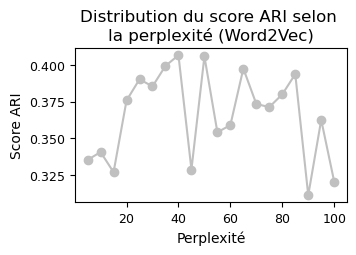

In [28]:
best_perp_w2v_med_filt = p6.best_perplexity(lab_category, embeddings_med_filt, "Word2Vec",
                                       perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle Word2Vec, le score ARI est : 0.40664


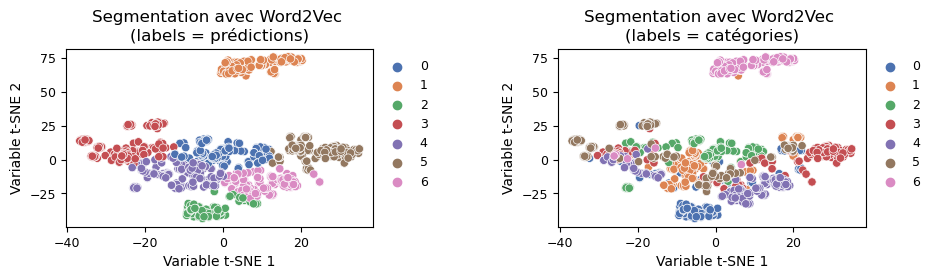

In [29]:
ARI_w2vec_med_filt, lab_w2vec_med_filt = p6.graph_t_sne("Word2Vec", best_perp_w2v_med_filt,
                                                     embeddings_med_filt, lab_category, n_clusters = 7)

<a class="anchor" id="section_1_3_2_3"></a>
#### Matrice de confusion

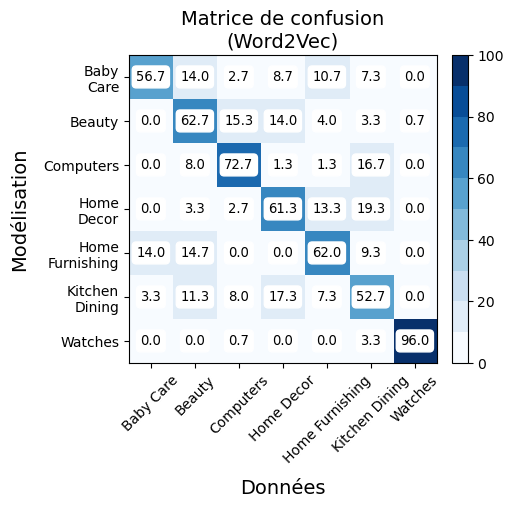

In [30]:
data["lab_w2vec_med_filt"] = pd.Series(lab_w2vec_med_filt)

p6.graph_matrix(lab_category, data["lab_w2vec_med_filt"], "Word2Vec")

En appliquant un filtre sur les mots, le score ARI est de 0.407. Il y a clairement un impact du filtre sur les mots car le score ARI sans ce filtre était de 0.333. Il y a une amélioration significative qui se retranscrit bien sur la matrice de confusion où les correspondances sont bien meilleures.

Nous allons modifier l'hyperparamètre "max_len" et vérifier s'il y a une augmentation du score ARI comme précédemment.

<a class="anchor" id="section_1_3_3"></a>
### Valeur maximum (hors outliers)

<a class="anchor" id="section_1_3_3_1"></a>
#### Création du vocabulaire

In [40]:
max_len_iqr_filt =  int(outlier_nbr(data["len_text_clean_bis"]))+1

In [41]:
w2v_min_count = 1
w2v_window = 5
w2v_size = 300
w2v_epochs = 100

w2v_model = gensim.models.Word2Vec(min_count = w2v_min_count, 
                                   window = w2v_window,
                                   vector_size = w2v_size,
                                   seed = 0,
                                   workers = 1)

w2v_model.build_vocab(sentences_bis)
w2v_model.train(sentences_bis, total_examples = w2v_model.corpus_count, epochs = w2v_epochs)

model_vectors = w2v_model.wv

w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))

Vocabulary size: 4778


In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences_bis)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences_bis),
                            maxlen = max_len_iqr_filt,
                            padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Number of unique words: 4779


In [43]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
display(embedding_matrix.shape)

i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

(4779, 300)

Word embedding rate :  1.0
Embedding matrix: (4779, 300)


In [44]:
input = Input(shape=(len(x_sentences), max_len_iqr_filt), dtype = 'float64')
word_input = Input(shape=(max_len_iqr_filt,),dtype='float64')  

word_embedding=Embedding(input_dim = vocab_size,
                         output_dim = w2v_size,
                         weights = [embedding_matrix],
                         input_length = max_len_iqr_filt)(word_input)

word_vec = GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 196)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 196, 300)          1433700   
                                                                 
 global_average_pooling1d_3   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,433,700
Trainable params: 1,433,700
Non-trainable params: 0
_________________________________________________________________


In [45]:
embeddings_iqr_filt = embed_model.predict(x_sentences)
embeddings_iqr_filt.shape

33/33 [==============================] - 0s 7ms/step


(1050, 300)

<a class="anchor" id="section_1_3_3_2"></a>
#### Visualisation t-SNE

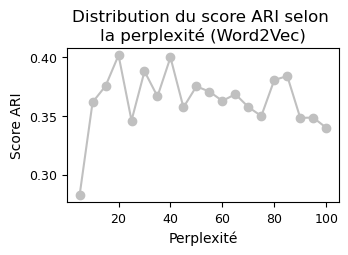

In [46]:
best_perp_w2v_iqr_filt = p6.best_perplexity(lab_category, embeddings_iqr_filt, "Word2Vec", 
                                            perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle Word2Vec, le score ARI est : 0.4018


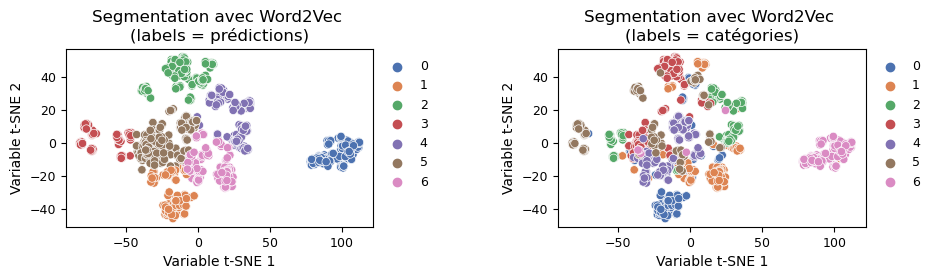

In [47]:
ARI_w2vec_iqr_filt, lab_w2vec_iqr_filt = p6.graph_t_sne("Word2Vec", best_perp_w2v_iqr_filt, 
                                                     embeddings_iqr_filt, lab_category, n_clusters = 7)

<a class="anchor" id="section_1_3_3_3"></a>
#### Matrice de confusion

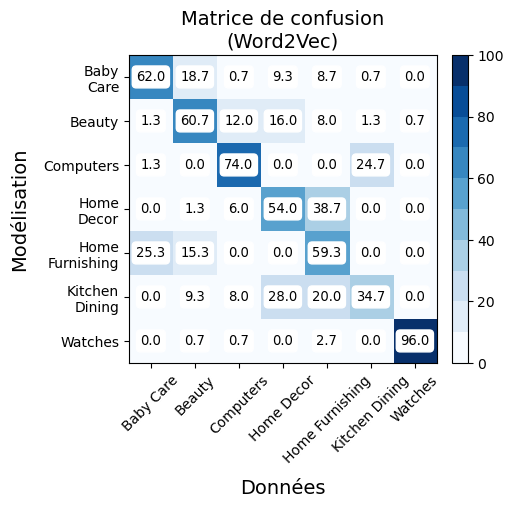

In [48]:
data["lab_w2vec_iqr_filt"] = pd.Series(lab_w2vec_iqr_filt)

p6.graph_matrix(lab_category, data["lab_w2vec_iqr_filt"], "Word2Vec")

Contrairement à l'observation faite en première partie, le score ARI n'augmente pas avec la longueur maximale des phrases. Le score ARI diminue légérement et cela se voit sur les catégories de cuisine et de meubles de maisons.

Nous allons poursuivre notre étude en augmentant encore la longueur maximale des phrases.

<a class="anchor" id="section_1_3_4"></a>
### Valeur maximum

<a class="anchor" id="section_1_3_4_1"></a>
#### Création du vocabulaire

In [58]:
max_len_max_filt = (data["len_text_clean_bis"].max())+1

In [59]:
w2v_min_count = 1
w2v_window = 5
w2v_size = 300
w2v_epochs = 100

w2v_model = gensim.models.Word2Vec(min_count = w2v_min_count, 
                                   window = w2v_window,
                                   vector_size = w2v_size,
                                   seed = 0,
                                   workers = 1)

w2v_model.build_vocab(sentences_bis)
w2v_model.train(sentences_bis, total_examples = w2v_model.corpus_count, epochs = w2v_epochs)

model_vectors = w2v_model.wv

w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))

Vocabulary size: 4778


In [60]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences_bis)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences_bis),
                            maxlen = max_len_max_filt,
                            padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Number of unique words: 4779


In [61]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
display(embedding_matrix.shape)

i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

(4779, 300)

Word embedding rate :  1.0
Embedding matrix: (4779, 300)


In [62]:
input = Input(shape=(len(x_sentences), max_len_max_filt), dtype = 'float64')
word_input = Input(shape=(max_len_max_filt,),dtype='float64')  

word_embedding=Embedding(input_dim = vocab_size,
                         output_dim = w2v_size,
                         weights = [embedding_matrix],
                         input_length = max_len_max_filt)(word_input)

word_vec = GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 573)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 573, 300)          1433700   
                                                                 
 global_average_pooling1d_5   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,433,700
Trainable params: 1,433,700
Non-trainable params: 0
_________________________________________________________________


In [63]:
embeddings_max_filt = embed_model.predict(x_sentences)
embeddings_max_filt.shape

33/33 [==============================] - 0s 8ms/step


(1050, 300)

<a class="anchor" id="section_1_3_4_2"></a>
#### Visualisation t-SNE

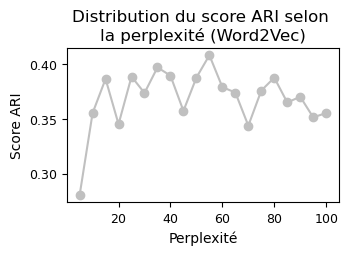

In [64]:
best_perp_w2v_max_filt = p6.best_perplexity(lab_category, embeddings_max_filt, "Word2Vec", 
                                            perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle Word2Vec, le score ARI est : 0.40805


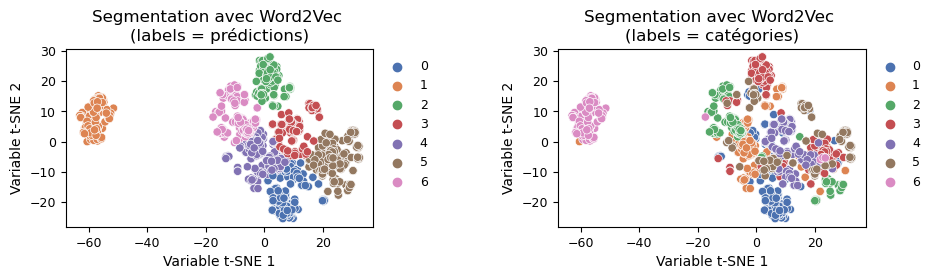

In [65]:
ARI_w2vec_max_filt, lab_w2vec_max_filt = p6.graph_t_sne("Word2Vec", best_perp_w2v_max_filt, embeddings_max_filt, 
                                                     lab_category, n_clusters = 7)

<a class="anchor" id="section_1_3_4_3"></a>
#### Matrice de confusion

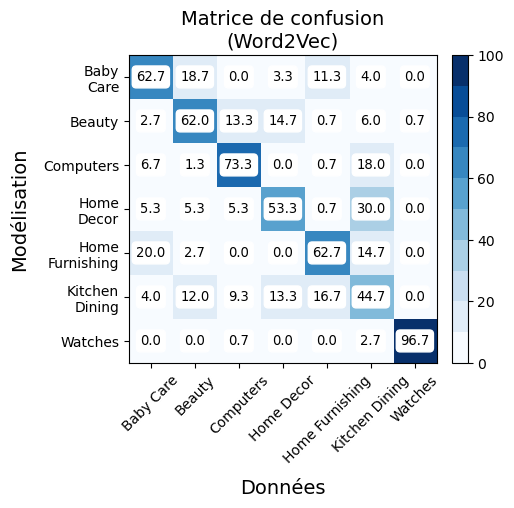

In [66]:
data["lab_w2vec_max_filt"] = pd.Series(lab_w2vec_max_filt)

p6.graph_matrix(lab_category, data["lab_w2vec_max_filt"], "Word2Vec")

Nous voyons ici que le score ARI est de 0.408 ce qui est très similaire à celui obtenu en considérant la médiane. Nous voyons que la matrice de confusion est semblable à celle obtenue en considérant la médiane.

Nous allons faire le bilan de l'étude menée avec l'algorithme Word2vec.
<a class="anchor" id="section_1_4"></a>
## Bilan

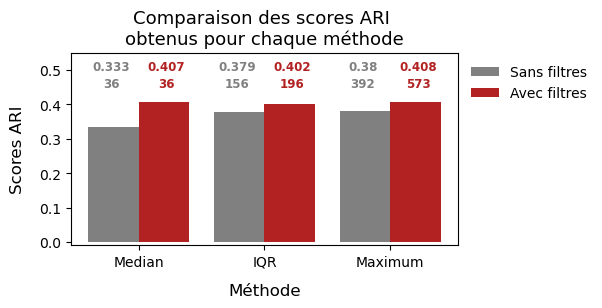

In [67]:
data_score_ARI = [ARI_w2vec_med, ARI_w2vec_med_filt, ARI_w2vec_iqr, ARI_w2vec_iqr_filt, ARI_w2vec_max, ARI_w2vec_max_filt]
val = ["Median", "IQR", "Maximum"]
val_max_length = [max_len_med, max_len_med_filt, 
                  max_len_iqr, max_len_iqr_filt,
                  max_len_max, max_len_max_filt]

plt.figure(figsize=(5,2.5))
x_axis = np.arange(0,3,1)

plt.bar(height = data_score_ARI[0::2], x = x_axis-0.2, width = 0.4, color = "gray", label = "Sans filtres")
plt.bar(height = data_score_ARI[1::2], x = x_axis+0.2, width = 0.4, color = "firebrick", label = "Avec filtres")

for i in range (0, len(x_axis)): 
    plt.text(i-0.22, 0.5, f"{round(data_score_ARI[2*i],3)}",fontsize=8.5, ha="center", color="gray", weight="bold")
    plt.text(i-0.22, 0.45, f"{round(val_max_length[2*i])}",fontsize=8.5, ha="center", color="gray", weight="bold")
    plt.text(i+0.22, 0.5, f"{round(data_score_ARI[2*i+1],3)}",fontsize=8.5, ha="center", color="firebrick", weight="bold")
    plt.text(i+0.22, 0.45, f"{round(val_max_length[2*i+1])}",fontsize=8.5, ha="center", color="firebrick", weight="bold")
    
    
plt.ylim(-0.01,0.55)

plt.xlabel("Méthode", fontsize=12, labelpad = 10)
plt.ylabel("Scores ARI", fontsize=12, labelpad = 10)

plt.xticks(x_axis, val, fontsize=10)
plt.yticks(fontsize=10)

plt.title("Comparaison des scores ARI \nobtenus pour chaque méthode", fontsize=13)

plt.legend(frameon = False, bbox_to_anchor=(1,1))
plt.show()

Nous voyons qu'appliquer un filtre sur les mots améliore le score ARI quelque soit la longueur de phrases.

Nous allons poursuivre notre étude avec l'algorithme BERT. Nous allons étudier l'influence de la longueur de phrases et nous allons utiliser deux modèles provenant de sources différentes : un modèle pré-entraîné provenant de Hugging Face et un autre provenant de Tensorflow.

<a class="anchor" id="chapter2"></a>
# Chapitre 2 : Bidirectional Encoder Representations from Transformers (BERT)

<a class="anchor" id="section_2_1"></a>
## Création de fonctions

In [68]:
import os
import transformers
# from transformers import *

os.environ["TF_KERAS"]='1'

In [69]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.1
2.10.1
Num GPUs Available:  0
True


In [70]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                               bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step == 0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot, last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [71]:
sentences_bert = data['text_clean_deep_l'].to_list()

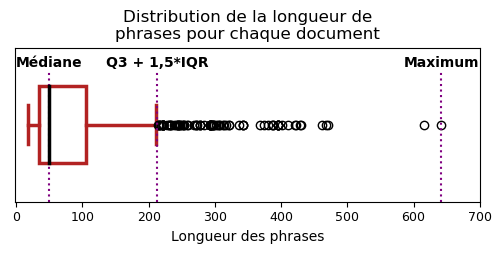

In [72]:
median_len = int(statistics.median(data["len_text_clean_dl"]))

iqr_len = int(outlier_nbr(data["len_text_clean_dl"]))+1

max_len = data["len_text_clean_dl"].max()


plt.figure(figsize=(6,2))
plt.boxplot(data['len_text_clean_dl'], vert=False, showfliers=True, patch_artist=True, widths = 1,
            flierprops = dict(color="firebrick", linewidth=0.5),
            capprops =dict(color="firebrick", linewidth=2.5),
            boxprops=dict(facecolor="white", color="firebrick",linewidth=2.5),
            whiskerprops=dict(color="firebrick", linewidth=2.5),
            medianprops=dict(color="black",linewidth=2.5),
            showmeans=False, 
            meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':(1, 1, 0, 0.5)})

plt.vlines(x = [median_len, iqr_len, max_len], ymin = 0, ymax = 1.7, ls="dotted", colors = 'purple')

plt.text(median_len, 1.75, "Médiane", fontsize=10, ha="center", color="black", weight="bold")
plt.text(iqr_len, 1.75, "Q3 + 1,5*IQR", fontsize=10, ha="center", color="black", weight="bold")
plt.text(max_len, 1.75, "Maximum", fontsize=10, ha="center", color="black", weight="bold")

plt.xlabel("Longueur des phrases",  fontsize=10)

plt.xticks(fontsize = 9)
plt.yticks([])

plt.xlim(-2,700)
plt.ylim(0,2)

plt.title("Distribution de la longueur de\nphrases pour chaque document", fontsize = 12)

plt.show()

<a class="anchor" id="section_2_2"></a>
## Modèle pré-entraîné (Hugging Face)

<a class="anchor" id="section_2_2_1"></a>
### Valeur médiane

<a class="anchor" id="section_2_2_1_1"></a>
#### Création du vocabulaire

In [73]:
max_len_bert_med = int(statistics.median(data["len_text_clean_dl"])) + 1
batch_size = 10
model_type = 'bert-base-uncased'
model_med = TFAutoModel.from_pretrained(model_type)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [74]:
features_bert_med, last_hidden_states_tot = feature_BERT_fct(model_med, model_type, sentences_bert, 
                                                             max_len_bert_med, batch_size, mode='HF')

1/1 [==============================] - 1s 809ms/step
temps traitement :  112.0


In [75]:
features_bert_med.shape

(1050, 768)

<a class="anchor" id="section_2_2_1_2"></a>
#### Visualisation t-SNE

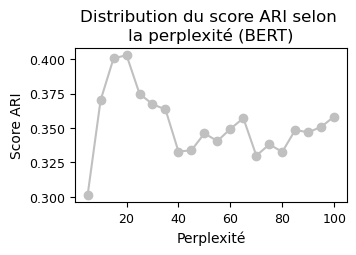

In [76]:
best_perp_bert_med = p6.best_perplexity(lab_category, features_bert_med, "BERT", 
                                        perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle BERT, le score ARI est : 0.40444


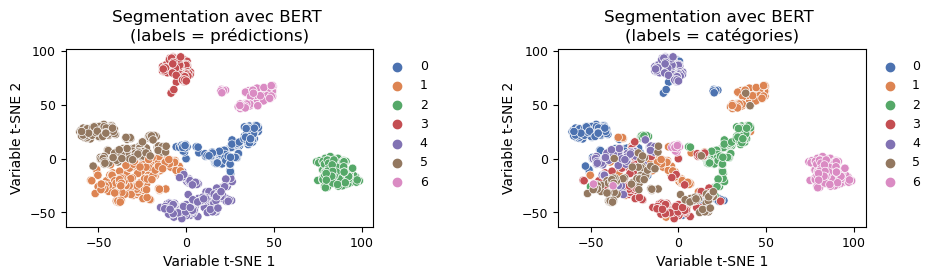

In [77]:
ARI_bert_med, lab_bert_med = p6.graph_t_sne("BERT", best_perp_bert_med, features_bert_med, lab_category, n_clusters = 7)

<a class="anchor" id="section_2_2_1_3"></a>
#### Matrice de confusion

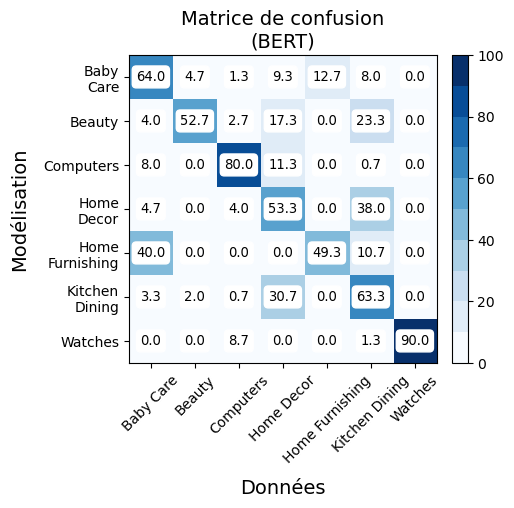

In [78]:
data["lab_bert_med"] = pd.Series(lab_bert_med)

p6.graph_matrix(lab_category, data["lab_bert_med"], "BERT")

Le score ARI est de 0.404 et nous obtenons une bonne correspondance des articles de montres mais aussi d'ordinateurs.

Nous allons augmenter l'hyperparamètrre "max_len" et voir s'il y a un effet ou non.
<a class="anchor" id="section_2_2_2"></a>
### Valeur maximum (hors outliers)
<a class="anchor" id="section_2_2_2_1"></a>
#### Création du vocabulaire

In [79]:
max_len_bert_iqr = int(outlier_nbr(data["len_text_clean_dl"])) + 1
batch_size = 10
model_type = 'bert-base-uncased'
model_iqr = TFAutoModel.from_pretrained(model_type)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [80]:
features_bert_iqr, last_hidden_states_tot = feature_BERT_fct(model_iqr, model_type, sentences_bert, 
                                                             max_len_bert_iqr, batch_size, mode='HF')

1/1 [==============================] - 3s 3s/step
temps traitement :  389.0


In [81]:
features_bert_iqr.shape

(1050, 768)

<a class="anchor" id="section_2_2_2_2"></a>
#### Visualisation t-SNE

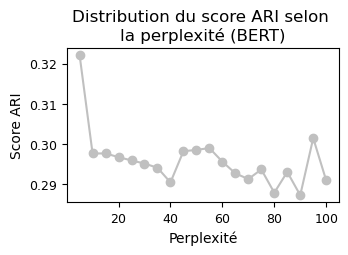

In [82]:
best_perp_bert_iqr = p6.best_perplexity(lab_category, features_bert_iqr, "BERT",
                                        perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle BERT, le score ARI est : 0.32096


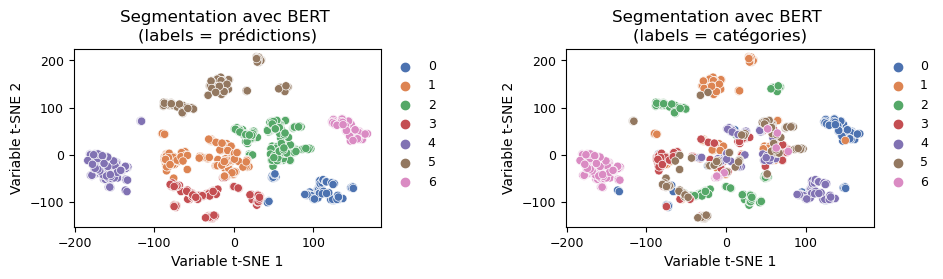

In [83]:
ARI_bert_iqr, lab_bert_iqr = p6.graph_t_sne("BERT", best_perp_bert_iqr, features_bert_iqr, lab_category, n_clusters = 7)

<a class="anchor" id="section_2_2_2_3"></a>
#### Matrice de confusion

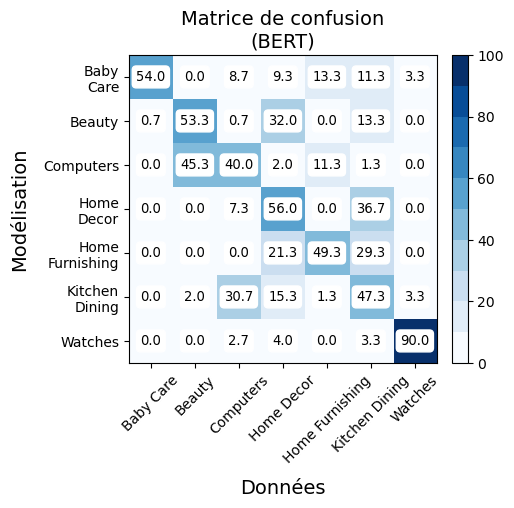

In [84]:
data["lab_bert_iqr"] = pd.Series(lab_bert_iqr)

p6.graph_matrix(lab_category, data["lab_bert_iqr"], "BERT")

Le fait d'augmenter la longueur des phrases fait diminuer le score ARI de 0.404 à 0.32. 

Nous allons encore augmenter la valeur de l'hyperparamètre "max_len".
<a class="anchor" id="section_2_2_3"></a>
### Valeur maximum
<a class="anchor" id="section_2_2_3_1"></a>
#### Création du vocabulaire

In [85]:
max_len_bert_max = 500
batch_size = 10
model_type = 'bert-base-uncased'
model_max = TFAutoModel.from_pretrained(model_type)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [86]:
features_bert_max, last_hidden_states_tot = feature_BERT_fct(model_max, model_type, sentences_bert, 
                                                             max_len_bert_max, batch_size, mode='HF')

1/1 [==============================] - 9s 9s/step
temps traitement :  1103.0


In [87]:
features_bert_max.shape

(1050, 768)

<a class="anchor" id="section_2_2_3_2"></a>
#### Visualisation t-SNE

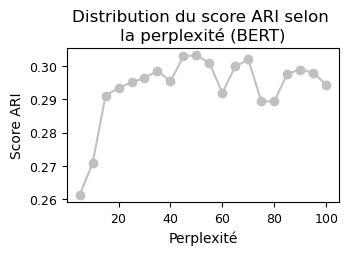

In [88]:
best_perp_bert_max = p6.best_perplexity(lab_category, features_bert_max, "BERT", 
                                        perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle BERT, le score ARI est : 0.30304


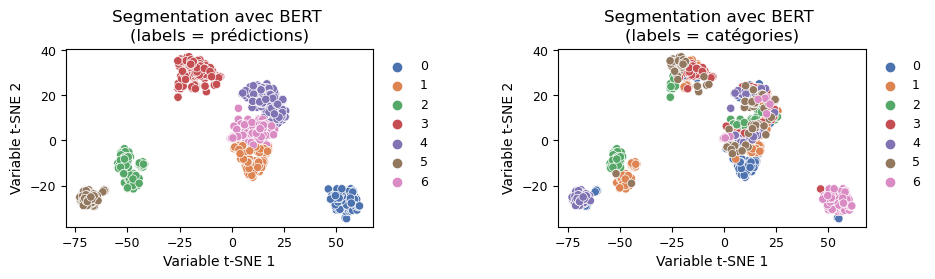

In [89]:
ARI_bert_max, lab_bert_max = p6.graph_t_sne("BERT", best_perp_bert_max, features_bert_max, lab_category, n_clusters = 7)

<a class="anchor" id="section_2_2_3_3"></a>
#### Matrice de confusion

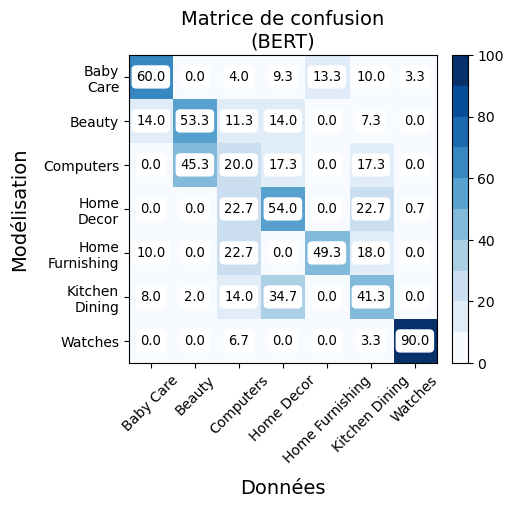

In [90]:
data["lab_bert_max"] = pd.Series(lab_bert_max)

p6.graph_matrix(lab_category, data["lab_bert_max"], "BERT")

La tendance semble se confirmer : augmenter la longueur de phrases diminue le score ARI et diminue aussi les correspondances globales.

Nous allons mener la même étude avec le modèle pré-entraîné Tensorflow.

<a class="anchor" id="section_2_3"></a>
## Modèle pré-entraîné (Tensorflow)

<a class="anchor" id="section_2_3_1"></a>
### Valeur médiane

<a class="anchor" id="section_2_3_1_1"></a>
#### Création du vocabulaire

In [91]:
import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [92]:
sentences = data['text_clean_deep_l'].to_list()

In [93]:
max_len_med = max_len_bert_med
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_hub_tf_med, last_hidden_states_tot_hub_tf = feature_BERT_fct(model, model_type, sentences, 
                                                                      max_len_med, batch_size, mode='TFhub')

temps traitement :  109.0


<a class="anchor" id="section_2_3_1_2"></a>
#### Visualisation t-SNE

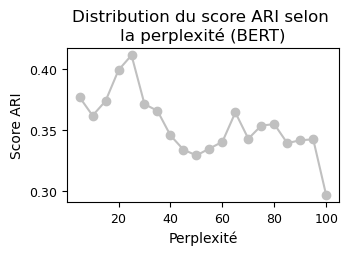

In [94]:
best_perp_hub_med = p6.best_perplexity(lab_category, features_hub_tf_med, "BERT", 
                                       perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle BERT, le score ARI est : 0.41115


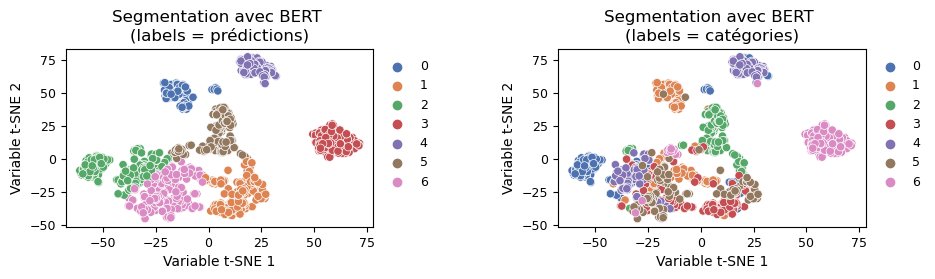

In [95]:
ARI_bert_hub_med, lab_bert_hub_med = p6.graph_t_sne("BERT", best_perp_hub_med, 
                                                    features_hub_tf_med, lab_category, n_clusters = 7)

<a class="anchor" id="section_2_3_1_3"></a>
#### Matrice de confusion

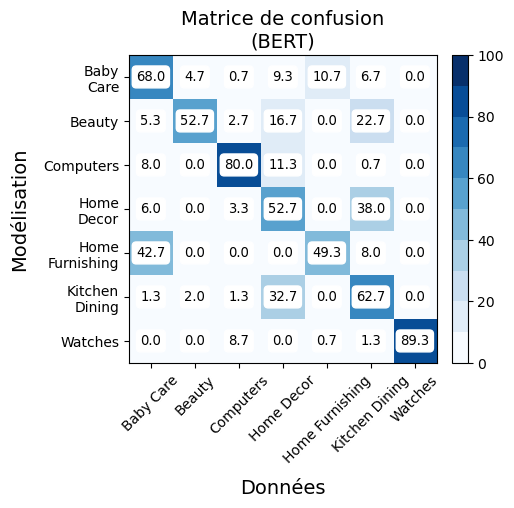

In [96]:
data["lab_bert_hub_med"] = pd.Series(lab_bert_hub_med)

p6.graph_matrix(lab_category, data["lab_bert_hub_med"], "BERT")

Avec le modèle pré-entraîné Tensorflow, le score ARI est légérement amélioré comparé au score ARI obtenu avec le modèle pré-entraîné Hugging Face. La matrice de confusion semble très similaire dans les deux cas et nous avons des bonnes correspondances pour les montres et les ordinateurs.

<a class="anchor" id="section_2_3_2"></a>
### Valeur maximum (hors outliers)
<a class="anchor" id="section_2_3_2_1"></a>
#### Création du vocabulaire

In [97]:
max_len_iqr = max_len_bert_iqr
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_hub_tf_iqr, last_hidden_states_tot_hub_tf = feature_BERT_fct(model, model_type, sentences, 
                                                                      max_len_iqr, batch_size, mode='TFhub')

temps traitement :  426.0


<a class="anchor" id="section_2_3_2_2"></a>
#### Visualisation t-SNE

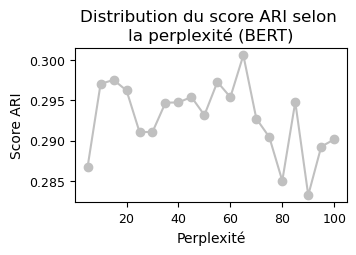

In [98]:
best_perp_hub_iqr = p6.best_perplexity(lab_category, features_hub_tf_iqr, "BERT",
                                       perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle BERT, le score ARI est : 0.30059


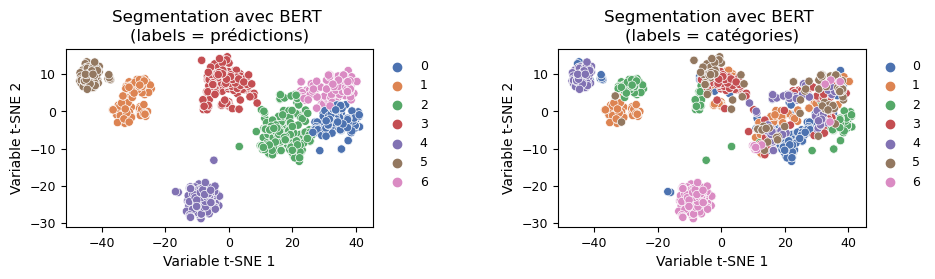

In [99]:
ARI_bert_hub_iqr, lab_bert_hub_iqr = p6.graph_t_sne("BERT", 65, features_hub_tf_iqr, lab_category, n_clusters = 7)

<a class="anchor" id="section_2_3_2_3"></a>
#### Matrice de confusion

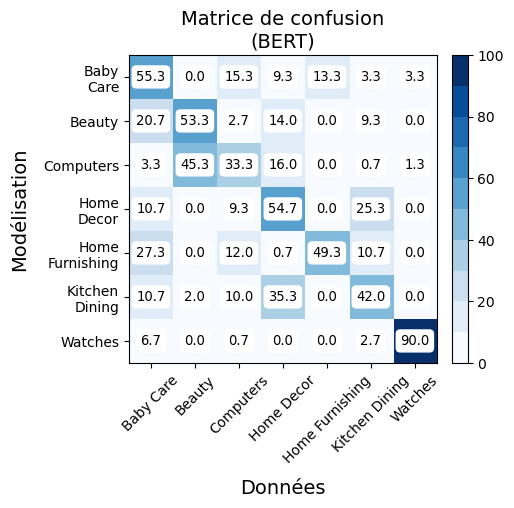

In [100]:
data["lab_bert_hub_iqr"] = pd.Series(lab_bert_hub_iqr)

p6.graph_matrix(lab_category, data["lab_bert_hub_iqr"], "BERT")

Nous voyons que le score ARI a fortement chuté en augmentant la longueur des phrases. 

<a class="anchor" id="section_2_3_3"></a>
### Valeur maximum
<a class="anchor" id="section_2_3_3_1"></a>
#### Création du vocabulaire

In [101]:
max_len_max = max_len_bert_max
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_hub_tf_max, last_hidden_states_tot_hub_tf = feature_BERT_fct(model, model_type, sentences, 
                                                                      max_len_max, batch_size, mode='TFhub')

temps traitement :  1186.0


<a class="anchor" id="section_2_3_3_2"></a>
#### Visualisation t-SNE

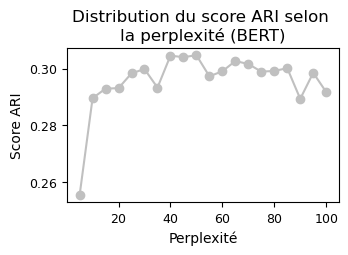

In [102]:
best_perp_tf_max = p6.best_perplexity(lab_category, features_hub_tf_max, "BERT", 
                                      perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle BERT, le score ARI est : 0.30477


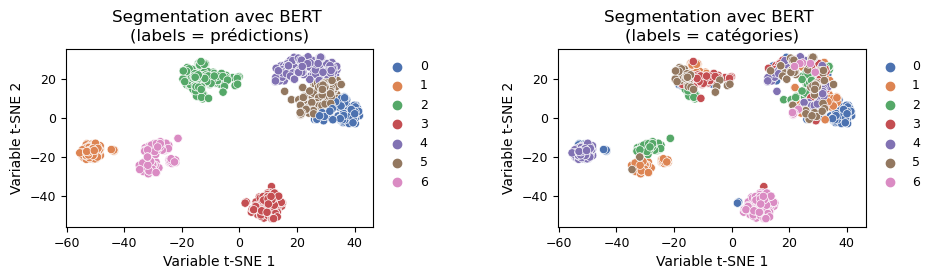

In [103]:
ARI_bert_hub_max, lab_bert_hub_max = p6.graph_t_sne("BERT", best_perp_tf_max, 
                                                    features_hub_tf_max, lab_category, n_clusters = 7)

<a class="anchor" id="section_2_3_3_3"></a>
#### Matrice de confusion

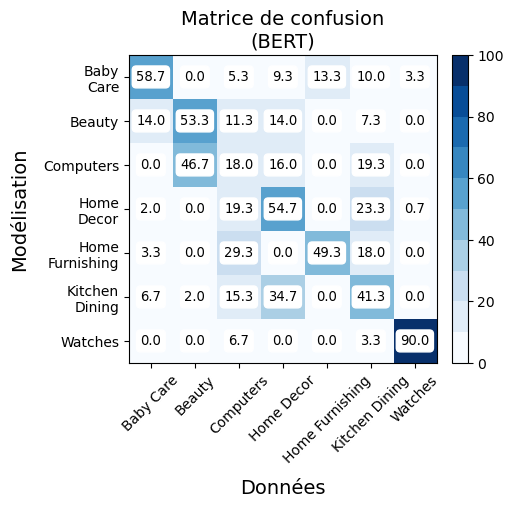

In [104]:
data["lab_bert_hub_max"] = pd.Series(lab_bert_hub_max)

p6.graph_matrix(lab_category, data["lab_bert_hub_max"], "BERT")

Le score ARI reste similaire à celui obtenu précédemment. Globalement, augmenter la longueur maximale des phrases diminue le score ARI et donc les performances de l'algorithme BERT pour reconnaître le texte. 
<a class="anchor" id="section_2_4"></a>
## Bilan

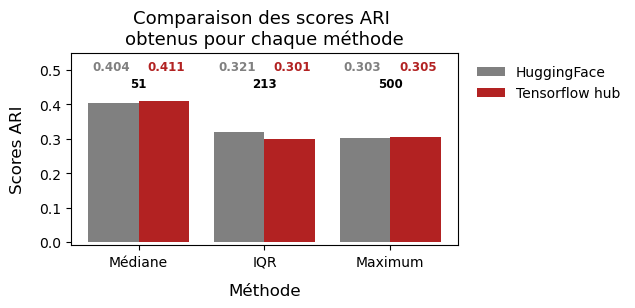

In [105]:
data_score_ARI_bert = [ARI_bert_med, ARI_bert_iqr, ARI_bert_max]
data_score_ARI_bert_hub = [ARI_bert_hub_med, ARI_bert_hub_iqr, ARI_bert_hub_max]
val = ["Médiane", "IQR", "Maximum"]
color = ["black", "firebrick", "gray"]
valeur_length_bert = [max_len_bert_med, max_len_bert_iqr, max_len_bert_max]


plt.figure(figsize=(5, 2.5))
x_axis = np.arange(0,3,1)

plt.bar(height = data_score_ARI_bert, x = x_axis-0.2, width = 0.4, color = "gray", label = "HuggingFace")
plt.bar(height = data_score_ARI_bert_hub, x = x_axis+0.2, width = 0.4, color = "firebrick", label= "Tensorflow hub")

for i in range (0, len(x_axis)): 
    plt.text(i-0.22, 0.5, f"{round(data_score_ARI_bert[i],3)}",fontsize=8.5, 
             ha="center", color="gray", weight="bold")
    plt.text(i, 0.45, f"{round(valeur_length_bert[i],3)}",fontsize=8.5, 
             ha="center", color="black", weight="bold")
    plt.text(i+0.22, 0.5, f"{round(data_score_ARI_bert_hub[i],3)}",fontsize=8.5, 
             ha="center", color="firebrick", weight="bold")
    
    
plt.ylim(-0.01,0.55)

plt.xlabel("Méthode", fontsize=12, labelpad = 10)
plt.ylabel("Scores ARI", fontsize=12, labelpad = 10)

plt.xticks(x_axis, val, fontsize=10)
plt.yticks(fontsize=10)

plt.title("Comparaison des scores ARI \nobtenus pour chaque méthode", fontsize=13)

plt.legend(frameon = False, bbox_to_anchor=(1.45,1))
plt.show()

Nous allons maintenant utiliser l'algorithme USE qui se base sur l'encodage de phrases et non pas de mots.

Ici, nous allons utiliser deux type de modèle : le modèle standard "universal-sentence-encoder" et "/universal-sentence-encoder-large". 

<a class="anchor" id="chapter3"></a>
# Chapitre 3 : Universal Sentence Encoder (USE)

<a class="anchor" id="section_3_1"></a>
## Encoder standard

<a class="anchor" id="section_3_1_1"></a>
### Création des variables

In [117]:
import tensorflow_hub as hub

embed_std = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [120]:
def feature_USE_fct(sentences, b_size, emb) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = emb(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    
    print(f"Temps de traitement : {time2} s.")
    
    return features

In [123]:
batch_size = 10
sentences = data['text_clean_deep_l'].to_list()
features_USE_std = feature_USE_fct(sentences, batch_size, embed_std)

Temps de traitement : 1.0 s.


In [124]:
features_USE_std.shape

(1050, 512)

<a class="anchor" id="section_3_1_2"></a>
### Visualisation t-SNE

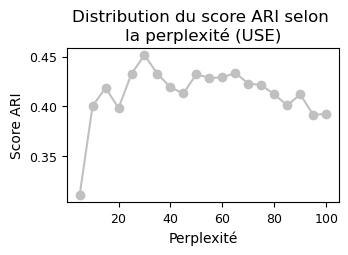

In [126]:
best_perp_use_std = p6.best_perplexity(lab_category, features_USE_std, "USE", 
                                       perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle USE, le score ARI est : 0.45138


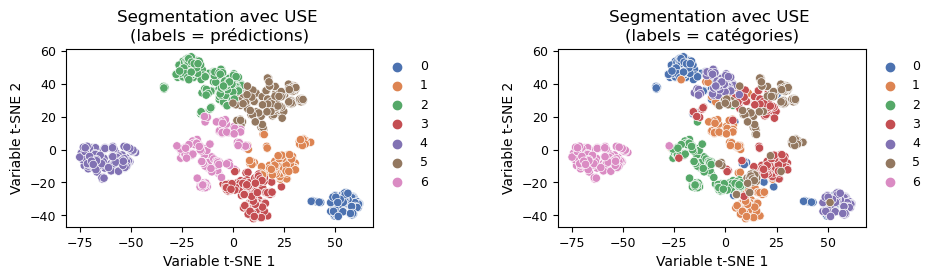

In [127]:
ARI_use_std, lab_use_std = p6.graph_t_sne("USE", best_perp_use_std, features_USE_std, lab_category, n_clusters = 7)

<a class="anchor" id="section_3_1_3"></a>
### Matrice de confusion

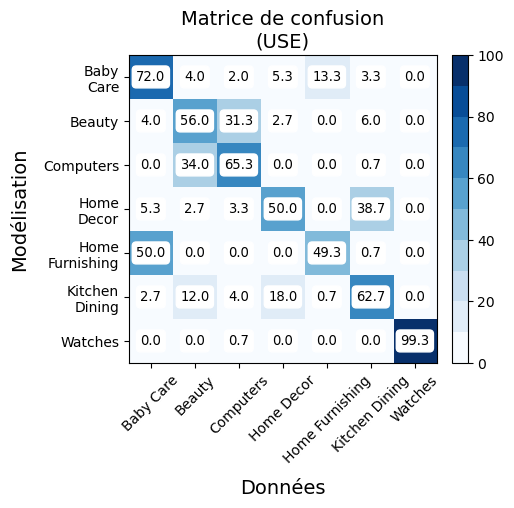

In [128]:
data["lab_use_std"] = pd.Series(lab_use_std)

p6.graph_matrix(lab_category, data["lab_use_std"], "USE")

Le modèle USE permet d'obtenir de meilleur résultat que ce que nous avons obtenue avec les algorithmes précédents. Ici, le score ARI est de 0,45 et les correspondances sont bonnes pour les montres et moyennes pour les autres catégories.

Nous allons utiliser l'autre type de modèle USE.
<a class="anchor" id="section_3_2"></a>
## Large encoder

<a class="anchor" id="section_3_2_1"></a>
### Création des variables

In [129]:
embed_large = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

In [130]:
batch_size = 10
sentences = data['text_clean_deep_l'].to_list()
features_USE_large = feature_USE_fct(sentences, batch_size, embed_large)

Temps de traitement : 61.0 s.


In [131]:
features_USE_large.shape

(1050, 512)

<a class="anchor" id="section_3_2_2"></a>
### Visualisation t-SNE

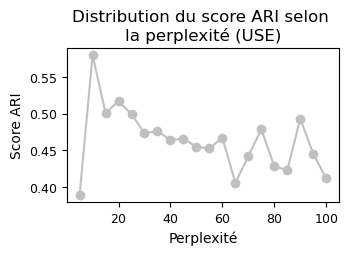

In [132]:
best_perp_use_large = p6.best_perplexity(lab_category, features_USE_large, "USE", 
                                   perp_min = 5, perp_max = 105, step = 5, n_clusters = n_clusters)

Pour le modèle USE, le score ARI est : 0.56826


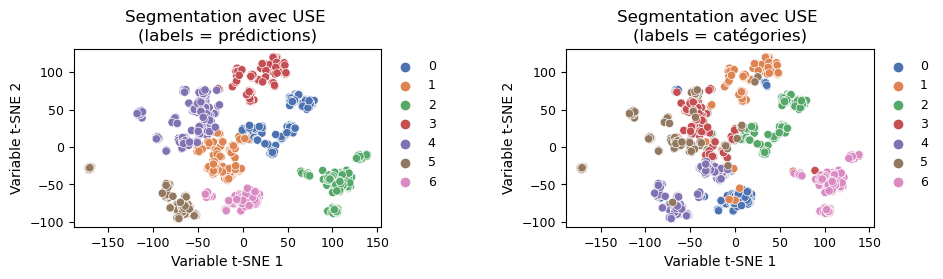

In [133]:
ARI_use_large, lab_use_large = p6.graph_t_sne("USE", best_perp_use_large, 
                                              features_USE_large, lab_category, n_clusters = 7)

<a class="anchor" id="section_3_2_3"></a>
### Matrice de confusion

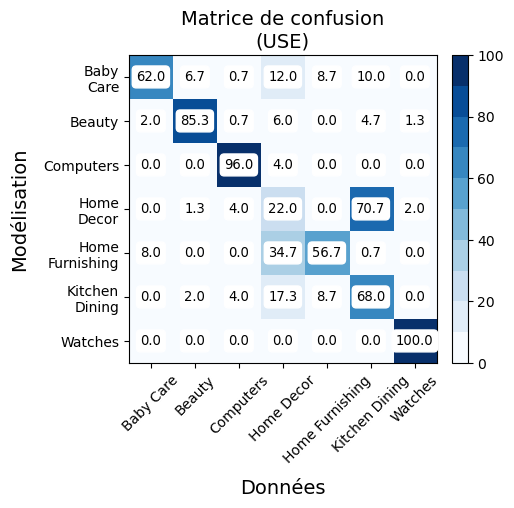

In [134]:
data["lab_use_large"] = pd.Series(lab_use_large)

p6.graph_matrix(lab_category, data["lab_use_large"], "USE")

Avec le modèle "large encoder", nous avons un meilleur score ARI qui est de 0.568. De plus les correspondances sont globalement très bonnes mise à part pour les catégories de décorations de maisons, meubles de maisons et de cuisine.

Nous allons faire un bilan de l'étude.
<a class="anchor" id="section_3_3"></a>
## Bilan de l'étude de texte

In [136]:
data_score = pd.read_csv("score_ari_text_1_projet_6.csv", low_memory=False, index_col=0)

In [137]:
ARI_countvec = data_score.iloc[0,1]
ARI_tfidf = data_score.iloc[9,1]

liste_to_plot = [ARI_countvec, ARI_tfidf, ARI_w2vec_max_filt, ARI_bert_hub_med, ARI_use_large]
méthode = ["CountVectorizer", "TF-IDF", "Word2vec", "BERT", "USE"]

df_score_final_ARI = pd.DataFrame(list(zip(liste_to_plot, méthode)))
df_score_final_ARI = df_score_final_ARI.rename(columns = {0 : "Score_ARI", 
                                                          1 : "Méthode"})

df_score_final_ARI = df_score_final_ARI.sort_values("Score_ARI", ascending = True)

display(df_score_final_ARI)

,Score_ARI,Méthode
2,0.40805,Word2vec
3,0.41115,BERT
0,0.41697,CountVectorizer
1,0.50370,TF-IDF
4,0.56826,USE


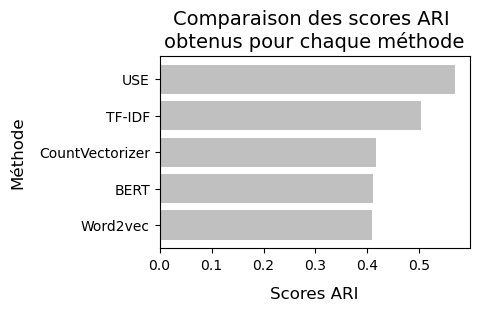

In [138]:
plt.figure(figsize=(4,2.5))

for i in range(0, df_score_final_ARI.shape[0]):
    plt.barh(width = df_score_final_ARI["Score_ARI"], y = df_score_final_ARI["Méthode"], 
            color = "silver")

plt.ylabel("Méthode", fontsize=12, labelpad = 10)
plt.xlabel("Scores ARI", fontsize=12, labelpad = 10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title("Comparaison des scores ARI \nobtenus pour chaque méthode", fontsize=14)

plt.show()

Nous pouvons voir que les algorithmes USE et TF-IDF sont les meilleurs ici. En revanche les algorithmes complexes comme BERT et Word2vec ne donnent pas de meilleurs résultats que les algorithmes simples comme CountVectorizer et TF-IDF.
Dans le prochain notebook, nous allons étudier l'algorithme de reconnaissance d'images SIFT. 

In [139]:
df_features_USE = pd.DataFrame(features_USE_large)
df_feat_USE = pd.merge(data[["image"]], df_features_USE, 
                           left_index=True, right_index=True, how="outer")

display(df_feat_USE.shape)
display(df_features_USE.shape)

(1050, 513)

(1050, 512)

In [140]:
df_feat_USE.to_csv('C:/Users/farid/Anaconda/Notebook/data_features_USE_projet_6.csv')